In [209]:
# Ariana Freitag
# ECE-475, Professor Sam Keene
# Logistic Regression: Implementing a Logistic Regression with Stochastic Gradient Descent
# Dataset From: http://users.stat.ufl.edu/~winner/data/apple_juice.dat 
# Description of Data: http://users.stat.ufl.edu/~winner/data/apple_juice.txt

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/Ariana/Desktop/2018-2019/MachineLearning/LogReg/appleJuice.csv")
train, validate, test = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])
# assign values to X and Y
X = train[['pH','Nisin','Temperature','Brix']]
y = train['Growth'].values
# non-regularized 
# Xnon = X
# Ynon = Y
# regularized
cols_to_norm = ['pH','Nisin','Temperature','Brix']
X[cols_to_norm] = X[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# set up validate and test
Xv = validate[['pH','Nisin','Temperature','Brix']]
yv = validate['Growth'].values
cols_to_norm = ['pH','Nisin','Temperature','Brix']
Xv[cols_to_norm] = Xv[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

Xt = test[['pH','Nisin','Temperature','Brix']]
yt = test['Growth'].values
cols_to_norm = ['pH','Nisin','Temperature','Brix']
Xt[cols_to_norm] = Xt[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))



/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


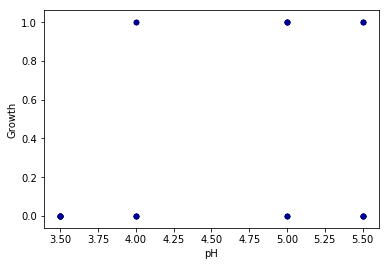

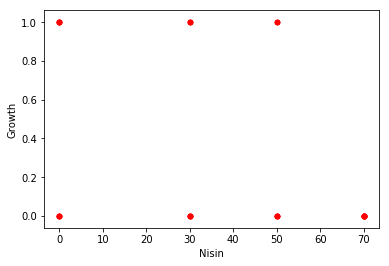

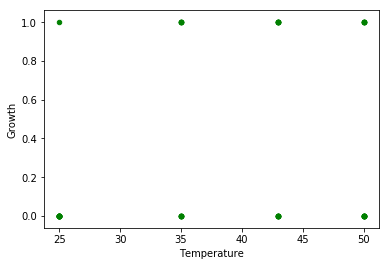

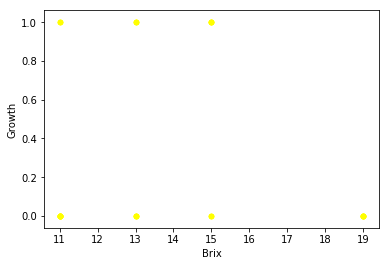

In [210]:
# plot training data
ax1 = train.plot.scatter(x='pH', y ='Growth', c='DarkBlue')
ax1 = train.plot.scatter(x='Nisin', y ='Growth', c='red')
ax1 = train.plot.scatter(x='Temperature', y ='Growth', c='green')
ax1 = train.plot.scatter(x='Brix', y ='Growth', c='yellow')

# these plots dont say much....

In [211]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, penalty):
    # add intercept term
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    likelyhood = np.empty(num_steps, dtype=object)
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += (learning_rate * gradient) - (penalty * weights)
        likelyhood[step] = log_likelihood(features, target, weights)
    return weights, likelyhood

def predict(features, weight):
    #add intercept term
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))
    
    # compute with sigmoid
    score = (-1) * np.dot(features, weight) # unsure if this is correct
    preds = np.round(sigmoid(score))
    
    return preds

In [216]:
# no penalty
log = logistic_regression(X, y, num_steps = 100000, learning_rate = 5e-5, penalty = 0)
y1 = predict(X.values, log[0])
# % correct
per1 = accuracy_score(y, y1)
per1

0.22033898305084745

In [213]:
# for plotting
log3 = logistic_regression(X, y, num_steps = 100000, learning_rate = 5e-5, penalty = 0.0001)
y3 = predict(X.values, log2[0])

In [214]:
# pick penalty based on validation set
log2 = logistic_regression(Xv, yv, num_steps = 100000, learning_rate = 5e-5, penalty = 0.0001)
y2 = predict(Xv.values, log2[0])
# % correct
per2 = accuracy_score(y2, yv)
per2

0.2857142857142857

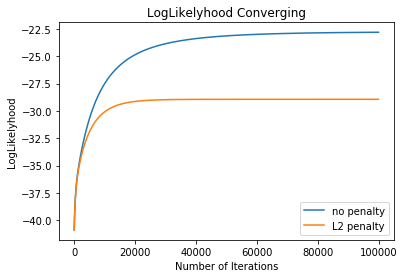

In [217]:
# plot log likelyhood for L2 and no penalty
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 100000, 100000, endpoint=False)
a = ax.plot(x, log[1], label='no penalty')
b = ax.plot(x, log3[1], label='L2 penalty')
ax.set_ylabel('LogLikelyhood')
ax.set_xlabel('Number of Iterations')
ax.set_title('LogLikelyhood Converging')
plt.legend()


In [220]:
# final score of models on test no penalty
log4 = logistic_regression(Xt, yt, num_steps = 100000, learning_rate = 5e-5, penalty = 0)
y4 = predict(Xt.values, log4[0])
# % correct
per4 = accuracy_score(y4, yt)
per4 # this was a 0% accuracy :-(

0.0

In [221]:
# final score for models on test, with penalty
log5 = logistic_regression(Xt, yt, num_steps = 100000, learning_rate = 5e-5, penalty = 0.0001)
y5 = predict(Xt.values, log5[0])
# % correct
per5 = accuracy_score(y5, yt)
per5 # this was a 0% accuracy :-(

0.0